# Testing Arbitrage Detection Analysis 

In [2]:
import sys
import os
import pandas as pd
from sklearn.metrics import root_mean_squared_error, r2_score

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

%matplotlib inline
print(os.getcwd())

/Users/das/DATASCI210/arbitrage_playground/notebooks


In [3]:
# change the active path to the parent directory 
print("Moving active path to parent directory")
os.getcwd()
os.chdir('..')
print(os.getcwd())

# import test code
from src.streamlit_app import load_model, etherscan_request, merge_pool_data, LGBM_Preprocessing, XGB_preprocessing


Moving active path to parent directory
/Users/das/DATASCI210/arbitrage_playground


2024-12-24 03:42:11.894 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:11.895 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:11.951 
  command:

    streamlit run /Users/das/Library/Caches/pypoetry/virtualenvs/streamlit-env-vnAgsWFf-py3.13/lib/python3.13/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-12-24 03:42:11.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:11.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:11.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:11.952 Thread 'MainThread': 

In [4]:
# API inputs: TODO - put these in a config file...
api_key = "16FCD3FTVWC3KDK17WS5PTWRQX1E2WEYV2"
pool0_address = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"
pool1_address = "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640"

price_model_name = "LGBM_Percent_Change_v1"
gasfee_model_name = "XGB_Gas_Prices_v2"

In [5]:
# fetch data from etherscan.io.
p0 = etherscan_request('tokentx', api_key, address=pool0_address)
p1 = etherscan_request('tokentx', api_key, address=pool1_address)

# merge data from both pools.
both_pools = merge_pool_data(p0,p1).iloc[:100]

# LGBM Preprocessing
lgbm_df, _, X_pct_test, y_pct_test = LGBM_Preprocessing(both_pools)
print(lgbm_df.shape, X_pct_test.shape, y_pct_test.shape)
model = load_model(price_model_name)


y_pct_pred = model.predict(X_pct_test)
rmse = root_mean_squared_error(y_pct_test, y_pct_pred)
r2 = r2_score(y_pct_test, y_pct_pred)

print(f"test_model_pricing_inference: Root Mean Squared Error: {rmse:.4f}")
print(f"test_model_pricing_inference: R² Score: {r2:.4f}")

2024-12-24 03:42:20.443 No runtime found, using MemoryCacheStorageManager
2024-12-24 03:42:20.444 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:20.445 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:20.446 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:20.951 Thread 'Thread-5': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:20.954 Thread 'Thread-5': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:22.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:22.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-24 03:42:22.655 Thread 'MainThread': mis

(45, 6) (45, 4) (45,)
test_model_pricing_inference: Root Mean Squared Error: 0.0168
test_model_pricing_inference: R² Score: -0.0110


In [12]:
pd.concat([lgbm_df['time'], pd.Series(y_pct_pred,name='prediction')],axis=1)

,time,prediction
7,2024-12-23 10:54:11,0.001074
8,2024-12-23 10:54:11,0.000865
9,2024-12-23 10:54:35,0.001176
10,2024-12-23 10:54:47,0.001192
11,2024-12-23 10:54:47,0.001182
12,2024-12-23 10:54:47,0.001211
13,2024-12-23 10:54:59,0.001211
14,2024-12-23 10:54:59,0.001211
15,2024-12-23 10:55:11,0.001211
16,2024-12-23 10:55:11,0.001211


KeyError: 'percent_change_label'

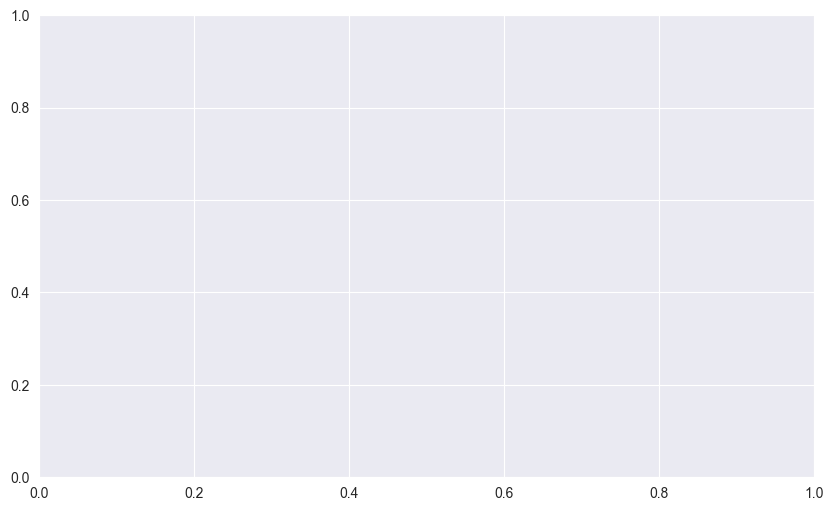

In [9]:
fig1, ax1 = plt.subplots(figsize=(10, 6))

pd.concat([lgbm_df['time'], pd.Series(y_pct_pred)],axis=1).plot.scatter(x='time',y='percent_change_label',ax=ax1)
# Format the x-axis for time
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
#ax1.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts tick frequency


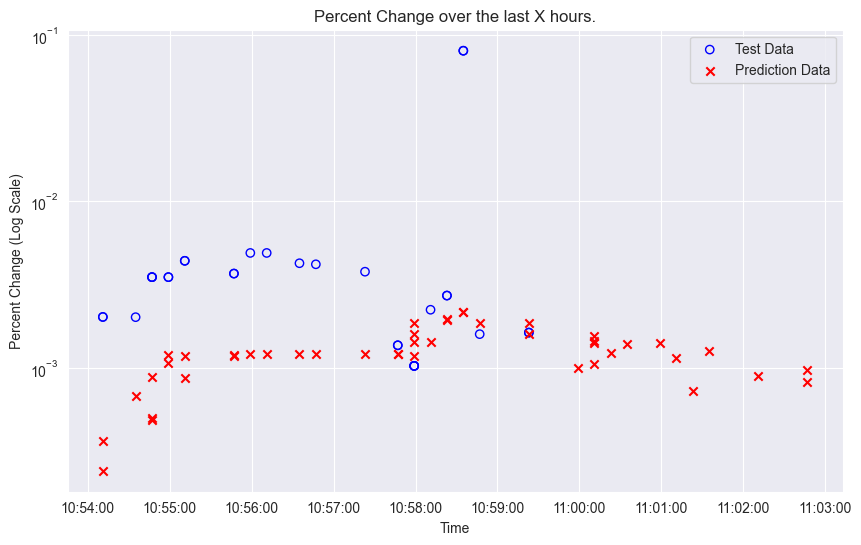

In [7]:

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# First scatter plot
ax.scatter(lgbm_df['time'], y_pct_test, label='Test Data', color='blue', marker='o',facecolors='none')

# Second scatter plot
ax.scatter(lgbm_df['time'], pd.Series(y_pct_pred), label='Prediction Data', color='red',marker='x')

# Format the x-axis for time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts tick frequency

ax.set_yscale('log')

# Add labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Percent Change (Log Scale)')
ax.set_title('Percent Change over the last X hours.')
ax.legend()  # Add a legend to differentiate the datasets



In [43]:

# LGBM Preprocessing
_, X_gas_test, y_gas_test = XGB_preprocessing(both_pools)

model = load_model(gasfee_model_name)


y_gas_pred = model.predict(X_gas_test)
rmse = root_mean_squared_error(y_gas_test, y_gas_pred)
r2 = r2_score(y_gas_test, y_gas_pred)

print(f"test_model_gasfee_inference: Root Mean Squared Error: {rmse:.4f}")
print(f"test_model_gasfee_inference: R² Score: {r2:.4f}")

test_model_gasfee_inference: Root Mean Squared Error: 19.0905
test_model_gasfee_inference: R² Score: -1670251846565888.0000


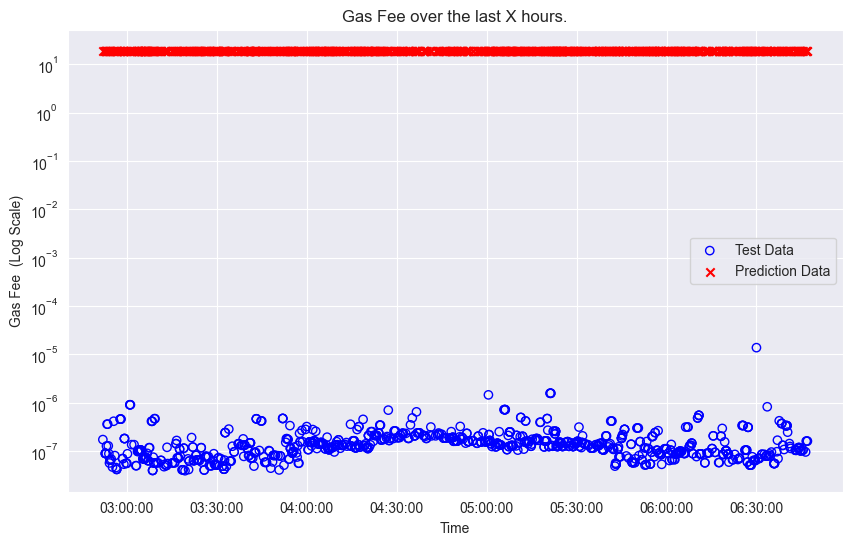

In [47]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# First scatter plot
ax.scatter(lgbm_df['time'].iloc[2:], y_gas_test, label='Test Data', color='blue', marker='o',facecolors='none')

# Second scatter plot
ax.scatter(lgbm_df['time'].iloc[2:], pd.Series(y_gas_pred), label='Prediction Data', color='red',marker='x')

# Format the x-axis for time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically adjusts tick frequency

ax.set_yscale('log')

# Add labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Gas Fee  (Log Scale)')
ax.set_title('Gas Fee over the last X hours.')
ax.legend()  # Add a legend to differentiate the datasets

